In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


EDA
=

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
gender_submission_df = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
numerical_columns = train_df.select_dtypes(include=["int64", "float64"])
numerical_columns.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
categorical_columns = train_df.select_dtypes(include=["object"])
categorical_columns.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train_df.isna().sum()[train_df.isna().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [9]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
train_df.loc[train_df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
train_df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
# Handle missing values

mean_age = train_df["Age"].mean()
median_fare = train_df["Fare"].median()
most_common_port = train_df["Embarked"].mode()[0]


train_df["Age"].fillna(mean_age, inplace=True)
train_df["Fare"].fillna(median_fare, inplace=True)
train_df["Embarked"].fillna(most_common_port, inplace=True)
train_df["Cabin"].fillna("Unavailable", inplace=True)

train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
test_df["Age"].fillna(mean_age, inplace=True)
test_df["Fare"].fillna(median_fare, inplace=True)
test_df["Embarked"].fillna(most_common_port, inplace=True)
test_df["Cabin"].fillna("Unavailable", inplace=True)

test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
train_df.duplicated().sum()

0

Data Visualizations
=

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# for col in train_df.columns:
#     if col != "Survived":
#         sns.histplot(train_df[train_df["Survived"]==1][col], color="tab:blue")
#         sns.histplot(train_df[train_df["Survived"]==0][col], color="tab:red")

#         plt.xlabel(col)
#         plt.ylabel("Count")
#         plt.title(f"{col} vs. Count")
        
#         plt.tight_layout()
#         plt.show()

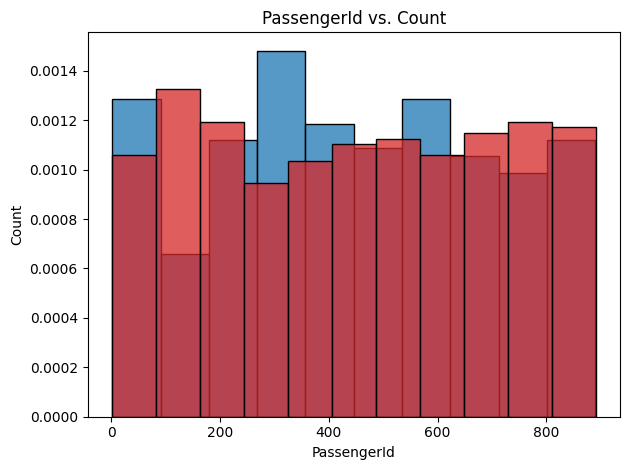

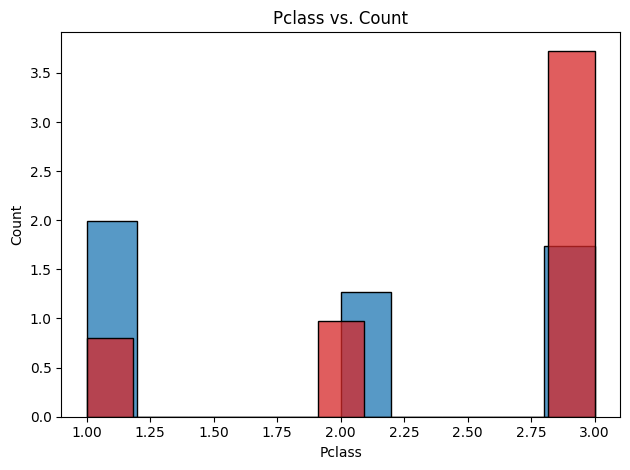

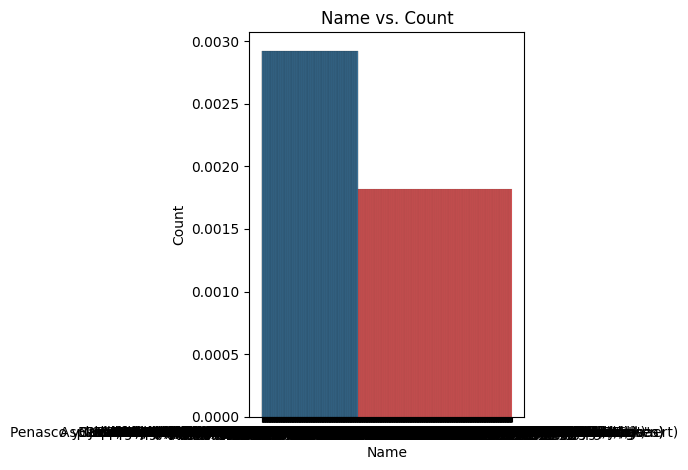

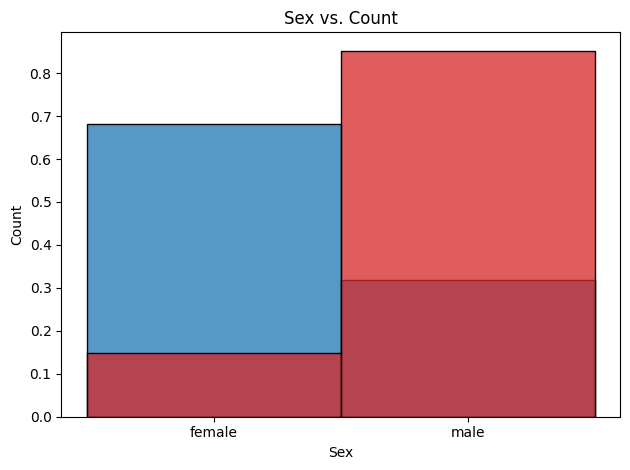

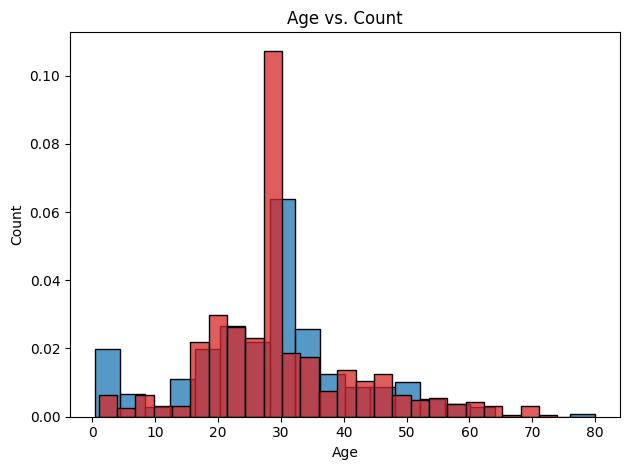

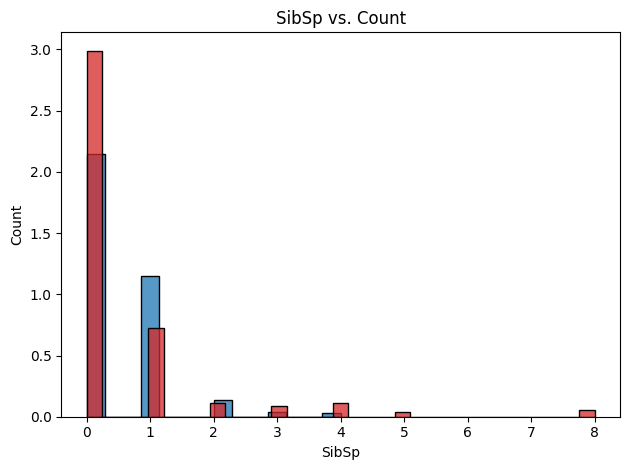

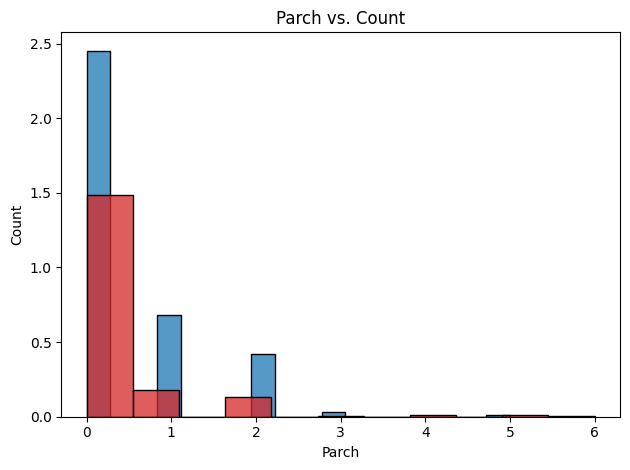

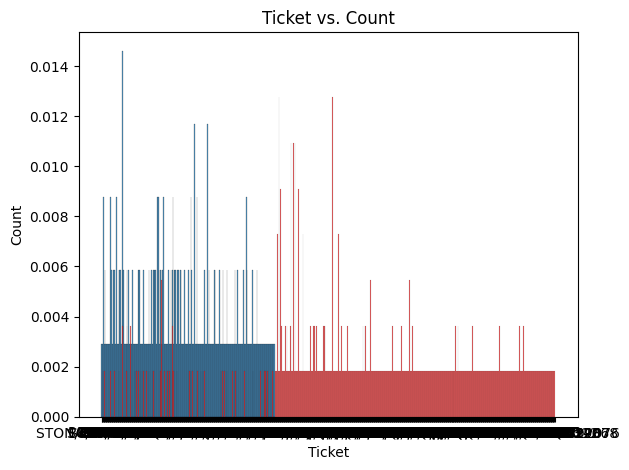

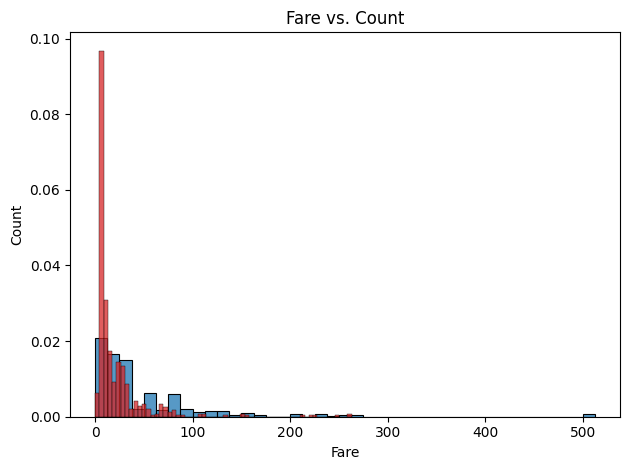

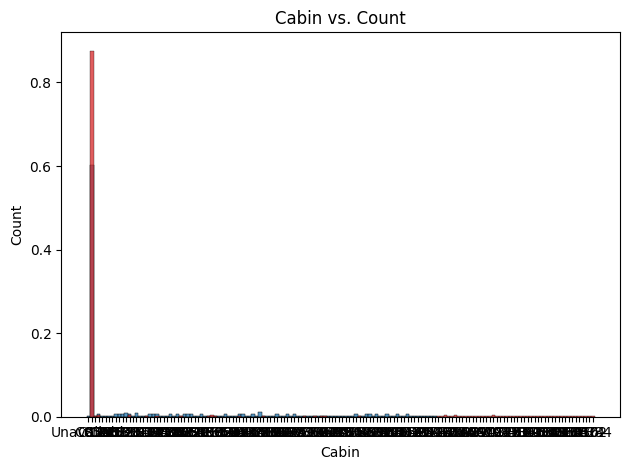

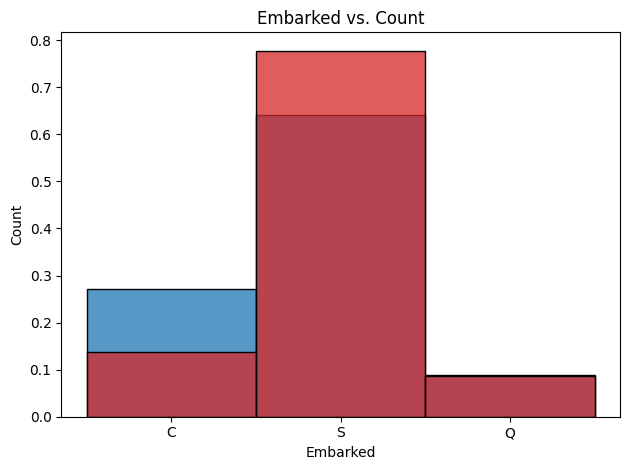

In [17]:
# 0 for dead (red)
# 1 for alive (blue)
for col in train_df.columns:
    if col != "Survived":
        # parameters to consider
        # stat="density" -> compare in shape
        # alpha -> values between 0 and 1
        
        sns.histplot(train_df[train_df["Survived"]==1][col], color="tab:blue", stat="density")
        sns.histplot(train_df[train_df["Survived"]==0][col], color="tab:red", stat="density")

        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} vs. Count")
        
        plt.tight_layout()
        plt.show()

We plot each graph and normalize the data by setting the stat parameter to density for easier comparisons.

From the graphs above, there seems to be a significant number of deaths of people who were in 3rd class, male, middle-aged, and had no siblings or spouses aboard.

Modeling
=

In [18]:
# Preprocess categorical variables
from sklearn.preprocessing import LabelEncoder

# Split data into train and test data
from sklearn.model_selection import train_test_split

# Models to try
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Measurements
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [19]:
def random_forest_model(x_train, x_val, y_train, y_val, total_trees=50, depth=5, random_state=18):
    acc_scores = []
    
    for num_trees in range(50, total_trees + 1, 50):
        model = RandomForestClassifier(n_estimators=num_trees, max_depth=depth, random_state=random_state)
        model.fit(x_train, y_train)
        
        predictions = model.predict(x_val)
        
        acc_score = accuracy_score(y_val, predictions)
        mae_score = mean_absolute_error(y_val, predictions)
        
        acc_scores.append({
            "Trees": num_trees,
            "acc_score": acc_score
        })
        # print(f"On average, with n_estimators: {num_trees} we our predictions are off by about ${mae_score}")



    return acc_scores
    

In [20]:
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN" : KNeighborsClassifier()
}
def evaluate_models(x_train, x_val, y_train, y_val):
    scores = []

    for name, model in models.items():
        model.fit(x_train, y_train)
        predictions = model.predict(x_val)

        score = accuracy_score(y_val, predictions)
        scores.append((name, score))

    return scores

Modeling with no cross validation
* Encode categorical values (Label Encoding)
* From the graphs above, there seems to be a significant number of deaths of people who were in 3rd class, male, middle-aged, and had no siblings or spouses aboard.

In [21]:
features = ["Pclass", "Age", "SibSp", "Sex"]
target = ["Survived"]
label_encoder = LabelEncoder()

y_train = train_df[target]
y_test = gender_submission_df[target]

In [22]:
train_df.drop(columns="Survived", axis=1, inplace=True)

In [23]:
combined_df = pd.concat([train_df, test_df], axis=0)
combined_df.reset_index(drop=True, inplace=True)

combined_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unavailable,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unavailable,S


In [24]:
# combined_df["Sex"] = label_encoder.fit_transform(combined_df["Sex"])
combined_df_encoded = combined_df["Sex"].map({"male": 0, "female": 1})

In [25]:
combined_df_encoded

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Sex, Length: 1309, dtype: int64

In [26]:
combined_df["Sex"] = combined_df_encoded
combined_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unavailable,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unavailable,S


In [27]:
x_train = combined_df[features].iloc[:891]
x_test = combined_df[features].iloc[891:]

In [28]:
random_forest_scores = random_forest_model(x_train, x_test, 
                                           y_train, y_test,
                                           total_trees=1500, depth=10)
acc_score_df = pd.DataFrame(random_forest_scores)

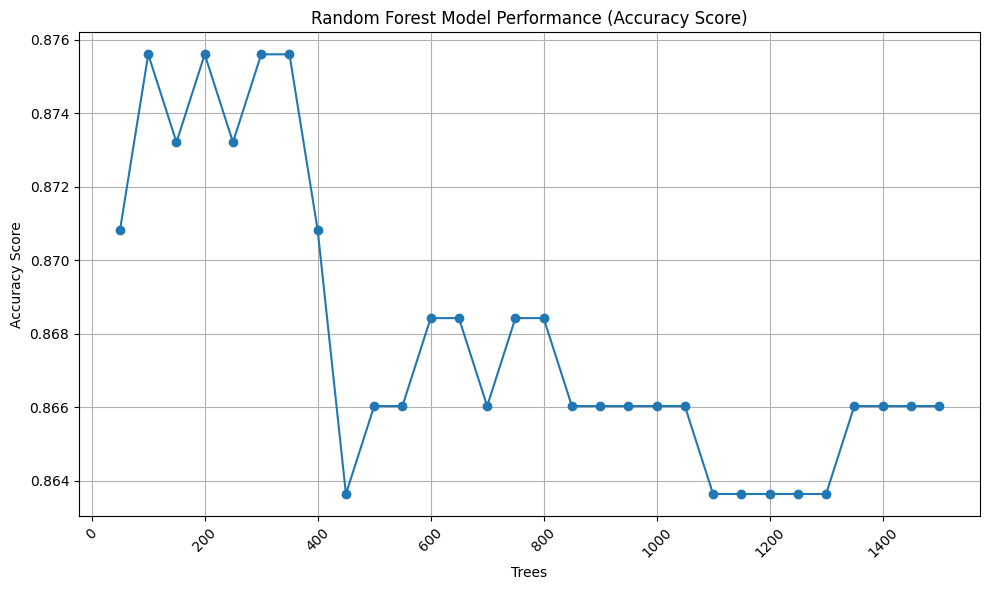

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(acc_score_df['Trees'], acc_score_df['acc_score'], marker='o', linestyle='-')
plt.title('Random Forest Model Performance (Accuracy Score)')
plt.xlabel('Trees')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
evaluation_models_scores = evaluate_models(x_train, x_test, y_train, y_test,)

In [31]:
evaluation_models_scores

[('Gradient Boosting', 0.9234449760765551), ('KNN', 0.80622009569378)]

Things I've learned
=

* I've learned the difference between a RandomForestRegressor and RandomForestClassifier... the hard way.
* For the task at hand, the classifier model was more appropriate. I was suppose to build a model based on classifying to predict categories rather than predicting continuous variables.
* Other classification models that were considered are KNN and GradientBoosting
* What I really appreciate about learning new material are the failures. It took me a few days, spread out in between, to figure out why I was getting low accuracy scores. That was because I was using the wrong metric, mean_absolute_error, which is more appropriate for regression. I did some research and found that accuracy_score is more appropriate to evaluate classification models.